In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
#prepare data
data = pd.read_csv('_Datapreprocessing.csv', skiprows = 2, sep=",") #remove 2 rows
data.drop('1', axis = 1, inplace = True)

In [3]:
#y label for regression
x = data.iloc[:, 1:6]
y = data.iloc[:, 6]

In [6]:
#for missing values
imputerr = KNNImputer(n_neighbors = 2)
x.iloc[:, 1:4] = imputerr.fit_transform(data.iloc[:, 2:5])

In [7]:
#the whole data
pd.DataFrame(x)
pd.DataFrame(y)
not_nan_data = x.join(y)

In [8]:
#for string data
label = LabelEncoder()
not_nan_data['CountryCode'] = label.fit_transform(not_nan_data['CountryCode'] )

In [9]:
#for categorical data
not_categorical_data = pd.get_dummies(not_nan_data)
not_categorical_data.drop(['International Visitors_D'], axis=1, inplace=True)

In [10]:
#for feature scaling
x_1 = pd.DataFrame(not_categorical_data.iloc[:, 0])
x_2 = not_categorical_data.iloc[:, 1:4]  #features need scaling
x_3 =  pd.DataFrame(not_categorical_data.iloc[:, 5:8])
y =  pd.DataFrame(not_categorical_data.iloc[:, 4])
transformer = StandardScaler()
d = transformer.fit_transform(x_2)
x_2_new = pd.DataFrame(d)
x_2_new.rename(columns={0:'Population growth', 1:'Total population', 2:'Area (sq. km)'}, inplace= True)

In [11]:
#whole data
data_feature_saling = x_1.join(x_2_new.join(x_3.join(y)))

In [13]:
#outlier
z = np.abs(stats.zscore(data_feature_saling))
data_outlier = data_feature_saling[(z < 3).all(axis = 1)]

In [14]:
data_outlier

,CountryCode,Population growth,Total population,Area (sq. km),International Visitors_A,International Visitors_B,International Visitors_C,Coronavirus Cases
1,1,0.047911,-0.430316,-0.518157,0,1,0,29061
2,2,0.150608,-0.198941,-0.369191,1,0,0,156727
3,3,-0.165666,-0.437042,-0.516835,0,1,0,8575
4,4,-0.907588,-0.311750,-0.296336,1,0,0,223759
5,5,-0.541737,-0.248057,-0.273539,1,0,0,161488
6,9,-1.002001,-0.060896,-0.361651,0,1,0,13231
7,6,-1.505832,-0.422920,-0.475120,0,0,1,2506
8,8,0.110920,-0.206385,0.247054,0,0,0,90481
9,10,1.674043,-0.443768,-0.524215,0,0,1,3075
10,11,-0.536627,-0.346528,-0.322293,0,0,1,4047


## Exploratory Data Analysis (EDA)

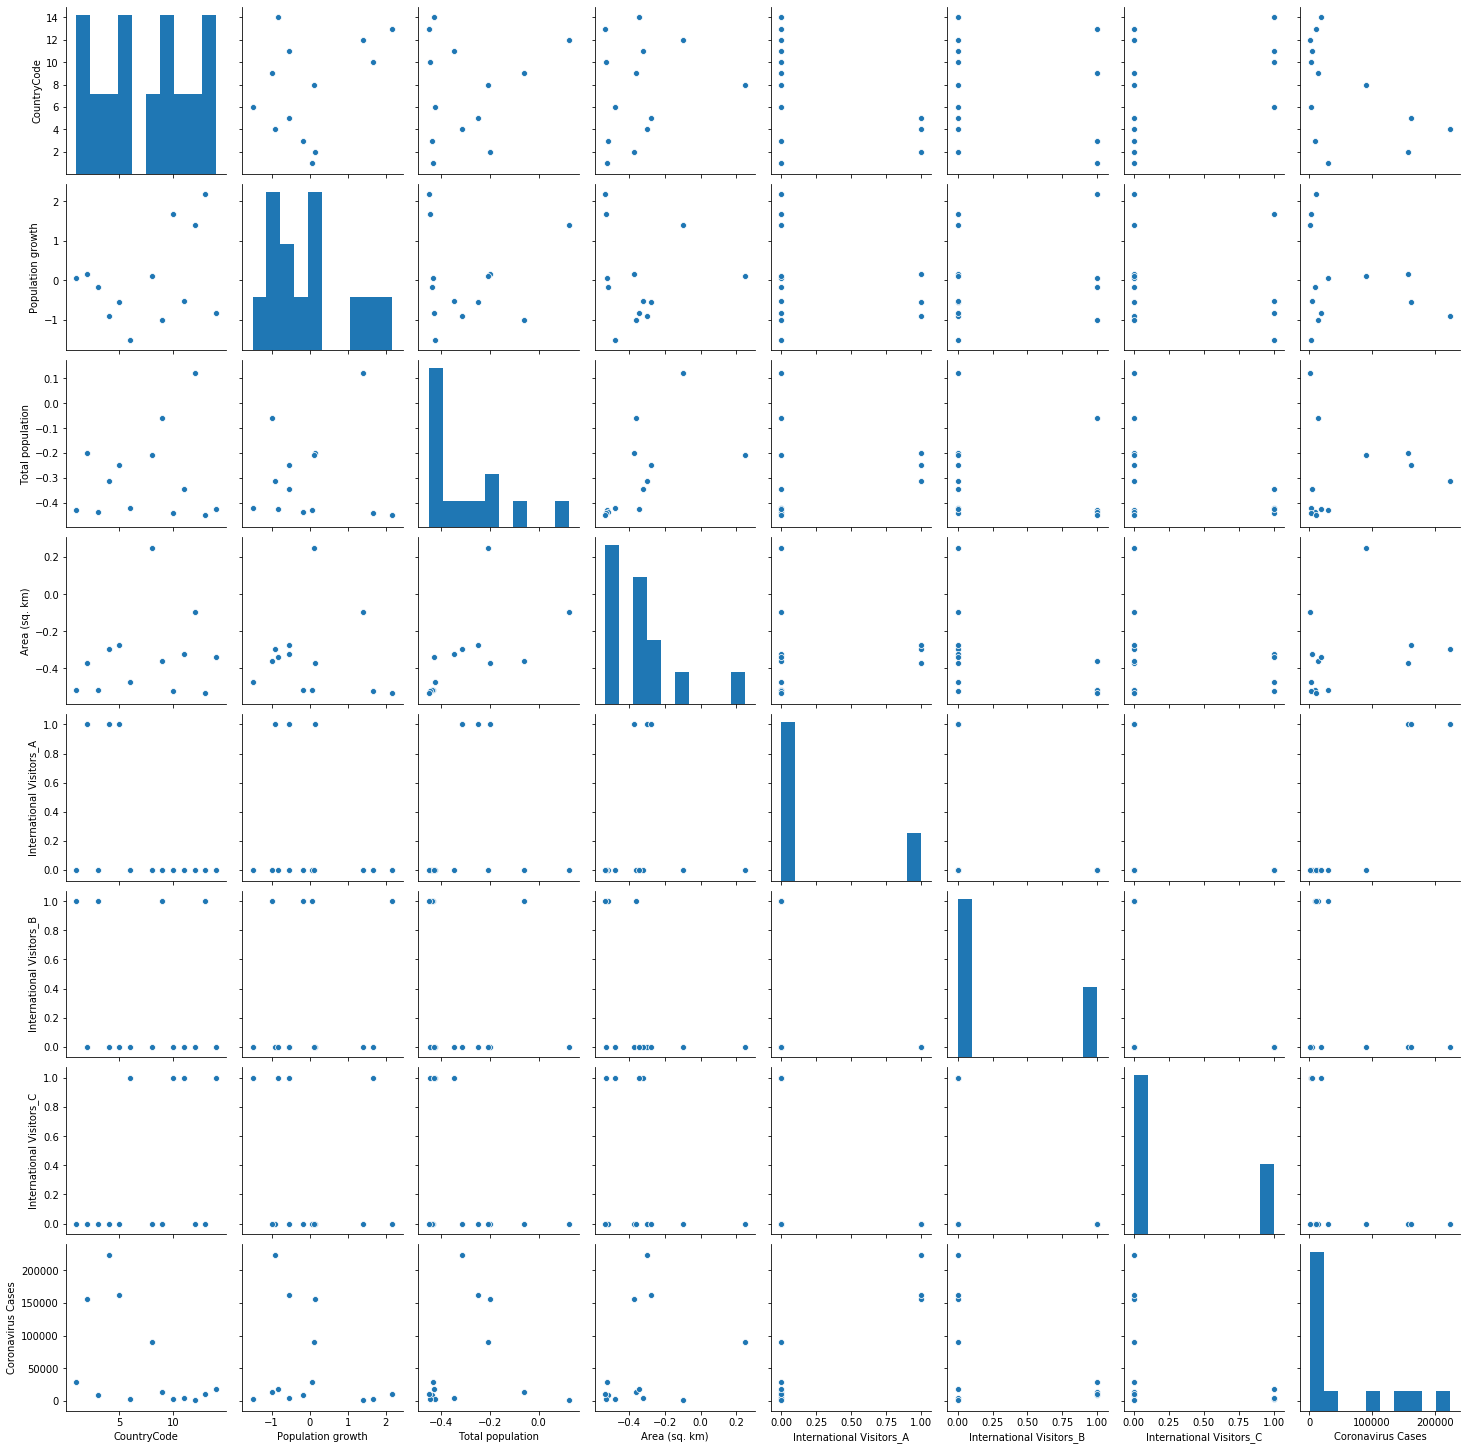

In [16]:
sns.pairplot(data_outlier) #scatter plot matrix
#namayesh hambastgi bein vizhegi ha . histogram va scatter plote

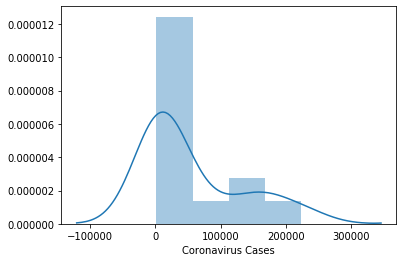

In [17]:
sns.distplot(data_outlier['Coronavirus Cases'])

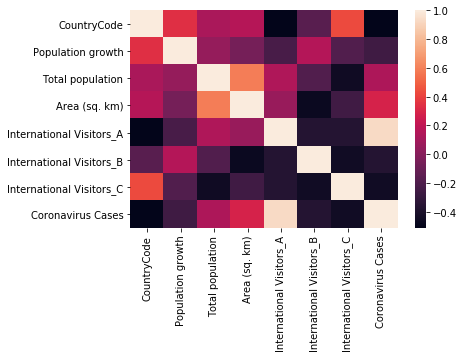

In [18]:
sns.heatmap(data_outlier.corr())

## simple linear regression

In [33]:
x = data_outlier.iloc[:, 0:7]
y = data_outlier.iloc[:, 7]
y

1      29061
2     156727
3       8575
4     223759
5     161488
6      13231
7       2506
8      90481
9       3075
10      4047
11      1182
12     10287
13     18640
Name: Coronavirus Cases, dtype: int64

## train test split

In [23]:
from sklearn.model_selection import train_test_split

In [35]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

## Train model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.intercept_

34810.7253468937

In [39]:
lm.coef_

array([-1.46443594e+01, -3.90994143e+03, -1.14065704e+05,  1.26228252e+05,
        1.54871492e+05,  3.19875291e+03, -2.30325997e+04])

In [51]:
coef_data = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coef_data

,Coefficient
CountryCode,-14.644359
Population growth,-3909.941425
Total population,-114065.704103
Area (sq. km),126228.251759
International Visitors_A,154871.492211
International Visitors_B,3198.752906
International Visitors_C,-23032.599688


## prediction

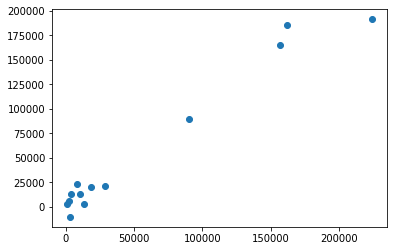

In [41]:
prediction_train = lm.predict(x)
plt.scatter(y, prediction_train)

## regression Evaluation Metrics

In [43]:
from sklearn import metrics

In [44]:
print('MAE: ', metrics.mean_absolute_error(y, prediction_train))

MAE:  10028.200328336952


In [45]:
print('MSE: ', metrics.mean_squared_error(y, prediction_train))

MSE:  181360724.8434098


In [46]:
print('RMSE: ', np.square(metrics.mean_squared_error(y, prediction_train)))

RMSE:  3.2891712515727004e+16


In [49]:
 3.2891712515727004*np.e+16

24.940894443839966

In [50]:
np.e

2.718281828459045

## Statsmodel

In [52]:
import statsmodels.formula.api as smf

In [55]:
lm1 = smf.ols(formula = 'Q("Coronavirus Cases") ~ Q("CountryCode") + Q("Population growth") + Q("Total population") + Q("Area (sq. km)") + Q("International Visitors_A") + Q("International Visitors_B") + Q("International Visitors_C")', data = data_outlier).fit()

In [56]:
lm1.params

Intercept                         34810.725347
Q("CountryCode")                    -14.644359
Q("Population growth")            -3909.941425
Q("Total population")           -114065.704103
Q("Area (sq. km)")               126228.251759
Q("International Visitors_A")    154871.492211
Q("International Visitors_B")      3198.752906
Q("International Visitors_C")    -23032.599688
dtype: float64

In [58]:
lm1.summary()

C:\Users\Hmdh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q("Coronavirus Cases")   R-squared:                       0.966
Model:                                OLS   Adj. R-squared:                  0.919
Method:                     Least Squares   F-statistic:                     20.57
Date:                    Thu, 11 Jun 2020   Prob (F-statistic):            0.00211
Time:                            20:01:48   Log-Likelihood:                -142.05
No. Observations:                      13   AIC:                             300.1
Df Residuals:                           5   BIC:                             304.6
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      3.481e+04   2.62e+04      1.328      0.242   -3.26e+04    1.02e+05
Q("CountryCode")                -14.6444   2658.317     -0.006      0.996   -6848.065    6818.776
Q("Population growth")        -3909.9414   1.06e+04     -0.369      0.727   -3.12e+04    2.33e+04
Q("Total population")         -1.141e+05   6.49e+04     -1.758      0.139   -2.81e+05    5.28e+04
Q("Area (sq. km)")             1.262e+05   9.76e+04      1.293      0.252   -1.25e+05    3.77e+05
Q("International Visitors_A")  1.549e+05   5.05e+04      3.065      0.028     2.5e+04    2.85e+05
Q("International Visitors_B")  3198.7529   6.67e+04      0.048      0.964   -1.68e+05    1.75e+05
Q("International Visitors_C") -2.303e+04   7.42e+04     -0.311      0.769   -2.14e+05    1.68e+05
==============================================================================
Omnibus:                        3.151   Durbin-Watson:                   3.288
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                1.044
Skew:                           0.624   Prob(JB):                        0.593
Kurtosis:                       3.608   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
lm1.conf_int()

,0,1
Intercept,-32576.160148,102197.610842
"Q(""CountryCode"")",-6848.064704,6818.775985
"Q(""Population growth"")",-31154.076975,23334.194124
"Q(""Total population"")",-280884.616962,52753.208757
"Q(""Area (sq. km)"")",-124681.803309,377138.306827
"Q(""International Visitors_A"")",24978.276371,284764.708050
"Q(""International Visitors_B"")",-168192.788572,174590.294384
"Q(""International Visitors_C"")",-213698.524740,167633.325364


In [60]:
lm1.pvalues

Intercept                        0.241597
Q("CountryCode")                 0.995818
Q("Population growth")           0.727296
Q("Total population")            0.139138
Q("Area (sq. km)")               0.252460
Q("International Visitors_A")    0.027946
Q("International Visitors_B")    0.963593
Q("International Visitors_C")    0.768687
dtype: float64

## Ridge Regression

In [81]:
#az underfit va overfit shodan jologiri mikone
from sklearn.linear_model import Ridge

In [79]:
model = Ridge(alpha= 1000)
model.fit(x, y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
prediction = model.predict(x)
print('RMSE: ', np.square(metrics.mean_squared_error(y, prediction)))

RMSE:  2.3980213150049382e+19


In [68]:
model.coef_

array([-199.15890218,  -26.20024744,    2.18262293,    5.77389983,
         37.26470889,  -16.20664348,  -19.20132738])